# EDA signals in the time doimain and in the frequency domain - classes


In [10]:
import numpy as np
import pandas as pd
from readers_preprocess import read_filter
from time_to_freq_domain import eval_psd_not_modulated, eval_psd
import matplotlib.pyplot as plt
%matplotlib notebook


In [4]:


path = ['data_bci\\row_data\\subject1\\']
columns_to_read =  ['FC2', 'class']

test_subject = '02'
freq = 512
train_subjects = ['01']

min_freq = 8
subject_results = []
knn_results = []



num_perseg = 128
num_overlap = 64
freq=512
min_freq = 8
max_freq = 45
classification_report = []

cutoff_beggining = 0
seq_len = freq
cut_step = int(seq_len/2)
window_train_data, window_filterd_train, window_train_anots, window_test_data, window_filterd_test, window_test_annoations = read_filter(path, train_subjects, test_subject, columns_to_read, cutoff_beggining, seq_len, cut_step)
   

row = window_train_data
psd_box =  eval_psd_not_modulated(row, num_perseg, num_overlap, freq, min_freq, max_freq)

In [5]:
window_train_anots[200]

0

In [6]:
idx_0 = 200
idx_1 = 400
idx_2 = 2
word = window_train_anots[idx_0]
left = window_train_anots[idx_1]
right = window_train_anots[idx_2]
word, left, right

(0, 1, 2)

In [7]:
word_signal = row[idx_0][:,0]
left_signal = row[idx_1][:,0]
right_signal = row[idx_2][:,0]
row_signals = [word_signal, left_signal, right_signal]
word_psd =  psd_box[idx_0][:,0]
left_psd = psd_box[idx_1][:,0]
right_psd = psd_box[idx_2][:,0]
psd_signals = [word_psd, left_psd, right_psd]

left_signal.shape, right_signal.shape,left_psd.shape,right_psd.shape

((512,), (512,), (10,), (10,))

In [15]:
def plot_eeg(signals, titles, colors, freq=512):
    num_signals = len(signals)
    
    time = np.arange(len(signals[0]))/freq
    fig, axes = plt.subplots(num_signals, 1)
    axes = axes.flatten()
    
    for signal_number in range(num_signals):
        X = signals[signal_number]
        X = (X-X.min())/(X.max()-X.min())
        ax = axes[signal_number]
        ax.plot(time, X, label=titles[signal_number], color=colors[signal_number])
        #ax.set_title(keep_columns[chanel_num]) 
        ax.legend()
        if signal_number == num_signals-1:
            ax.set_xlabel('Time [s]')
        ax.set_ylabel('Relative Amplitude')
        
        
def plot_freqs(signals, titles, freqs_values, colors):
    # recover the frequencies
    num_signals = len(signals)
    
    fig, axes = plt.subplots(1, num_signals)
    axes = axes.flatten()
    
    for signal_number in range(num_signals):
        X = signals[signal_number]
        X = (X-X.min())/(X.max()-X.min())
        ax = axes[signal_number]
        ax.plot(freqs_values, X, label=titles[signal_number], color=colors[signal_number])
        #ax.set_title(keep_columns[chanel_num]) 
        ax.legend()

        ax.set_xlabel('Frequencies [Hz]')
        if signal_number==0:
            ax.set_ylabel('Relative Energy')
        ax.legend()

<IPython.core.display.Javascript object>


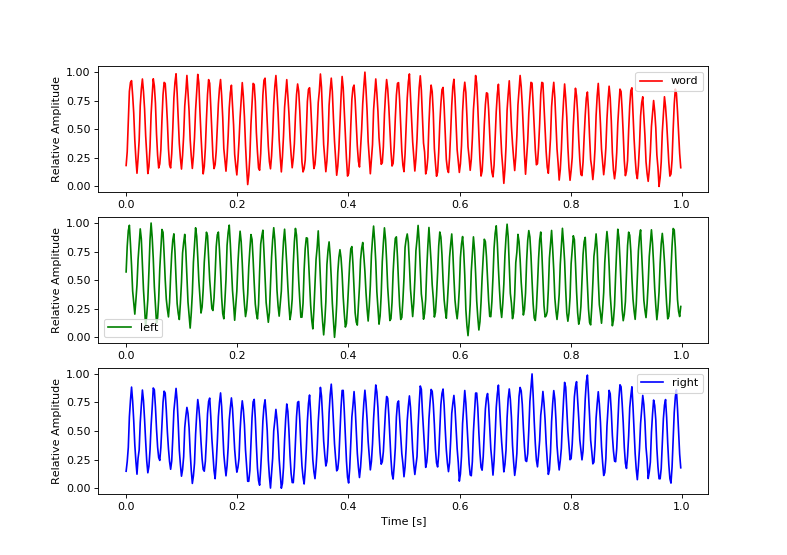

In [16]:
plot_eeg(row_signals, ['word','left','right'], colors=['r','g','b'])

<IPython.core.display.Javascript object>


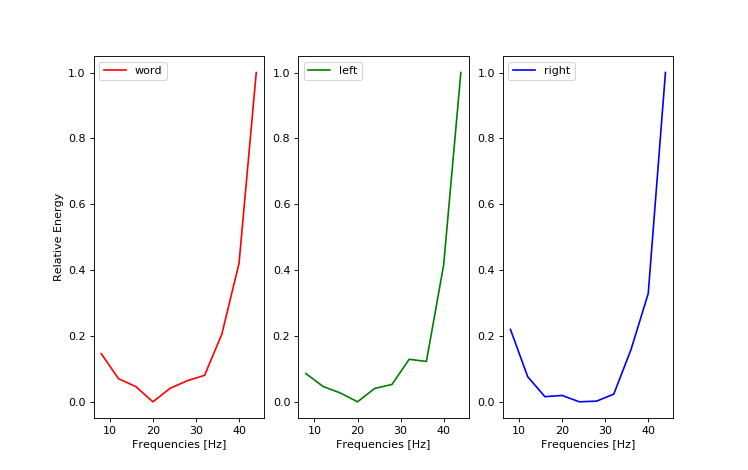

In [18]:
freqs_values = np.arange(8,45,4)

plot_freqs(psd_signals, ['word','left','right'], freqs_values, colors=['r','g','b'])